# Модель для прогноза «соотношение матрица-наполнитель» («SMN»)

Предобработка

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt

In [2]:
#директория проекта
diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузить подготовленные данные
df = pd.read_csv(diraddr + 'data/processed/df_no_outliers.csv')
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
#шкалируем на [0,1]
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.rename(columns={
    0:'UN',
    1:'ShN',
    2:'PN',
    3:'SMN',
    4:'P',
    5:'MU',
    6:'KO',
    7:'SEG',
    8:'TV',
    9:'PP',
    10:'MUR',
    11:'PR',
    12:'PS'
}, inplace = True)
#df.describe().T

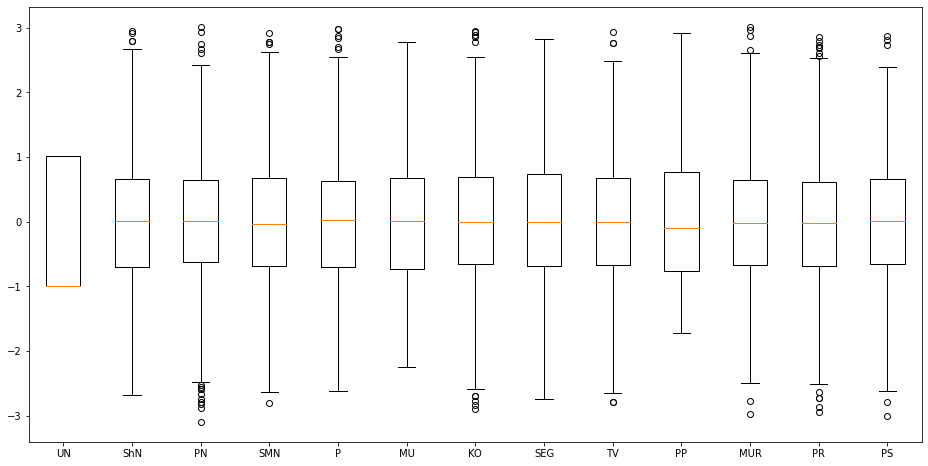

In [5]:
#вывод ящиков
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(df, labels = df.columns)
plt.show()

In [6]:
#преобразовать в массивы
x = np.array(df.drop(columns=['SMN','MUR','PR',]))
y = np.array(df.drop(columns=['UN','ShN','PN','P','MU','KO','SEG','TV','PP','MUR','PR','PS']))

In [7]:
#разделить оба массива на train и test 70 на 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700, 1), (300, 1))

Модель

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(y_train.shape[1], activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',loss='mae',metrics=['mae','mse'])

In [10]:
model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100
56/56 [==============================] - 1s 6ms/step - loss: 0.9236 - mae: 0.9236 - mse: 1.3235 - val_loss: 0.7989 - val_mae: 0.7989 - val_mse: 1.0405
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.8550 - mae: 0.8550 - mse: 1.1340 - val_loss: 0.7861 - val_mae: 0.7861 - val_mse: 1.0194
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.8445 - mae: 0.8445 - mse: 1.1080 - val_loss: 0.7889 - val_mae: 0.7889 - val_mse: 1.0205
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.8405 - mae: 0.8405 - mse: 1.0961 - val_loss: 0.7911 - val_mae: 0.7911 - val_mse: 1.0221
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.8377 - mae: 0.8377 - mse: 1.0848 - val_loss: 0.7914 - val_mae: 0.7914 - val_mse: 1.0216
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.8353 - mae: 0.8353 - mse: 1.0838 - val_loss: 0.7921 - val_mae: 0.7921 - val_mse: 1.0221
Epoch 7/100
56/56 [===

56/56 [==============================] - 0s 2ms/step - loss: 0.8063 - mae: 0.8063 - mse: 1.0199 - val_loss: 0.8085 - val_mae: 0.8085 - val_mse: 1.0489
Epoch 52/100
56/56 [==============================] - 0s 2ms/step - loss: 0.8066 - mae: 0.8066 - mse: 1.0205 - val_loss: 0.8083 - val_mae: 0.8083 - val_mse: 1.0480
Epoch 53/100
56/56 [==============================] - 0s 2ms/step - loss: 0.8062 - mae: 0.8062 - mse: 1.0200 - val_loss: 0.8086 - val_mae: 0.8086 - val_mse: 1.0491
Epoch 54/100
56/56 [==============================] - 0s 2ms/step - loss: 0.8061 - mae: 0.8061 - mse: 1.0217 - val_loss: 0.8082 - val_mae: 0.8082 - val_mse: 1.0473
Epoch 55/100
56/56 [==============================] - 0s 2ms/step - loss: 0.8061 - mae: 0.8061 - mse: 1.0206 - val_loss: 0.8090 - val_mae: 0.8090 - val_mse: 1.0500
Epoch 56/100
56/56 [==============================] - 0s 2ms/step - loss: 0.8059 - mae: 0.8059 - mse: 1.0187 - val_loss: 0.8097 - val_mae: 0.8097 - val_mse: 1.0526
Epoch 57/100
56/56 [=========

In [11]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.7858 - mae: 0.7858 - mse: 0.9506


[0.785813570022583, 0.785813570022583, 0.9505930542945862]

In [14]:
result = model.predict(x_test)
#for i in range(len(y_test)): 
#    print(y_test[i], result[i])

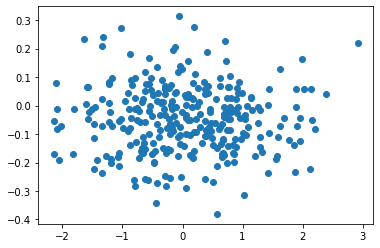

In [15]:
plt.scatter(y_test, result)